#***Netflix stock Price Estimation***

In [29]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [30]:
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX (2).csv


In [32]:
df = pd.read_csv('NFLX.csv')
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
5,2015-12-23,116.910004,118.559998,115.779999,118.160004,118.160004,9324300
6,2015-12-24,118.220001,118.800003,117.300003,117.330002,117.330002,3531300
7,2015-12-28,117.260002,117.349998,113.849998,117.110001,117.110001,8424300
8,2015-12-29,118.190002,119.599998,116.919998,119.120003,119.120003,8159200
9,2015-12-30,118.949997,119.019997,116.430000,116.709999,116.709999,8149700


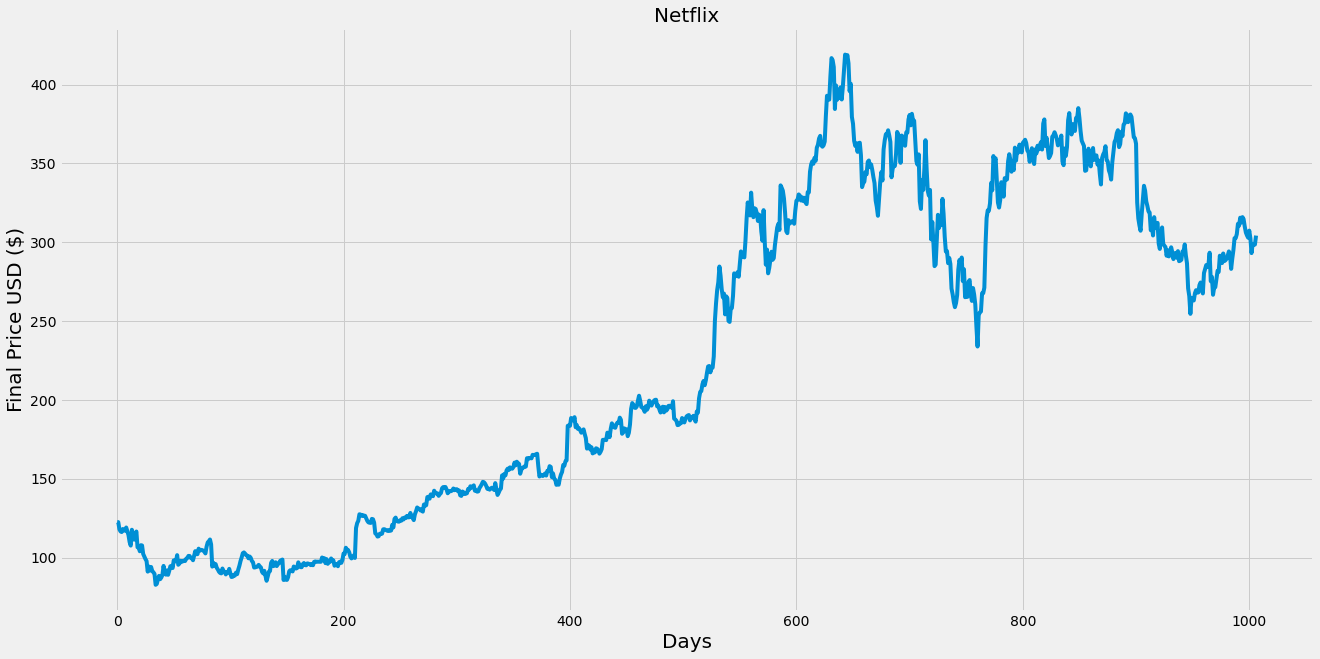

In [36]:
plt.figure(figsize=(20,10))
plt.title('Netflix', fontsize = 20)
plt.xlabel('Days', fontsize= 20)
plt.ylabel('Final Price USD ($)', fontsize = 20)
plt.plot(df['Close'])
plt.show()

In [51]:
#We just need the Stock Closing Values
df = df[['Close']]
df.head(10)

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997
4,116.239998
5,118.160004
6,117.330002
7,117.110001
8,119.120003
9,116.709999


In [78]:
#Create a variable to predict 'n' days out into the future, I'm predicting for 50 days
fd = 50
#Create a new column (the target or dependent variable) shifted 'n' units/days up
df['Estimation'] = df[['Close']].shift(-fd)
#print the data
df.tail(10)

,Close,Estimation
997,306.160004,NaN
998,304.320007,NaN
999,302.859985,NaN
1000,307.350006,NaN
1001,302.500000,NaN
1002,293.119995,NaN
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [79]:
#Create the feature data set((Means X in X,Y pair)
X = np.array(df.drop(['Estimation'], 1))[:-fd]# index 1 for estimation column
print(X)

[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [80]:
#Create the target data set((Means Y in X,Y pair)
y = np.array(df['Estimation'])[:-fd]
print(y)

[ 98.300003  97.610001  97.93     101.580002  95.489998  96.230003
  98.        97.360001  97.660004  98.129997  97.860001  99.349998
  99.720001 101.120003 101.059998  99.839996  99.589996  98.360001
 101.209999 104.129997 102.190002 102.230003 105.699997 104.349998
 104.940002 104.830002 104.449997 103.809998 102.68     106.980003
 109.650002 110.419998 111.510002 108.400002  94.339996  96.769997
  94.980003  95.900002  93.559998  92.43      91.040001  90.279999
  90.029999  93.110001  91.540001  90.790001  89.370003  90.839996
  90.540001  92.889999  90.019997  87.739998  87.879997  89.120003
  88.629997  90.5       89.550003  92.489998  94.889999  97.889999
 100.199997 102.809998 103.300003 102.57     101.510002 101.25
  99.589996 100.739998  99.889999  97.860001  97.089996  93.75
  93.849998  94.120003  94.290001  95.440002  94.449997  93.800003
  90.989998  90.010002  91.660004  88.440002  85.330002  87.970001
  91.059998  91.480003  96.669998  97.910004  94.599998  95.099998
  9

##Now we split the data into 80% training and 20% testing data sets for Maximum Accuracy(Avoid taking 50/50).

In [81]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


## Here we are testing with 2 different models[tree regressor model, linear regression model]If there is a high non-linearity & complex relationship between dependent & independent variables, a tree model will outperform a classical regression method. If you need to build a model which is easy to explain to people, a decision tree model will always do better than a linear model.

In [82]:

#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [83]:
#Get the feature data, 
#AKA all the rows from the original data set except the last 'x' days
x_future = df.drop(['Estimation'], 1)[:-fd]
#Get the last 'x' rows
x_future = x_future.tail(fd) 
#Convert the data set into a numpy array
x_future = np.array(x_future)
print(x_future)

[[335.779999]
 [332.700012]
 [325.929993]
 [322.98999 ]
 [319.5     ]
 [318.829987]
 [307.630005]
 [310.100006]
 [304.290009]
 [315.899994]
 [308.929993]
 [310.829987]
 [312.279999]
 [299.109985]
 [295.76001 ]
 [302.799988]
 [309.380005]
 [298.98999 ]
 [297.809998]
 [296.929993]
 [291.440002]
 [294.980011]
 [291.029999]
 [291.769989]
 [296.779999]
 [293.75    ]
 [289.290009]
 [291.519989]
 [293.25    ]
 [290.170013]
 [294.339996]
 [287.98999 ]
 [288.269989]
 [288.859985]
 [294.149994]
 [294.290009]
 [298.600006]
 [291.559998]
 [286.600006]
 [270.75    ]
 [265.920013]
 [254.589996]
 [264.75    ]
 [263.309998]
 [263.079987]
 [267.619995]
 [269.579987]
 [268.029999]
 [268.149994]
 [272.790009]]


In [84]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print( tree_prediction )
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[274.459991 331.074997 267.529999 280.480011 282.929993 285.529999
 284.25     286.279999 293.350006 275.299988 278.049988 266.690002
 271.269989 291.450012 276.820007 281.859985 281.209991 291.450012
 312.48999  286.809998 292.859985 288.029999 288.589996 289.570007
 291.570007 294.179993 292.01001  283.109985 289.619995 339.5
 315.549988 302.600006 305.160004 311.690002 310.480011 315.549988
 312.48999  315.929993 314.660004 309.98999  306.160004 304.320007
 302.859985 307.350006 302.5      293.119995 298.929993 298.440002
 298.5      304.209991]

[329.38447697 326.68391573 320.74790012 318.17007815 315.11002246
 314.52254883 304.70230047 306.86802032 301.77376092 311.95350373
 305.84214204 307.50807444 308.77945845 297.23186771 294.29457848
 300.46729665 306.23671674 297.12665498 296.09202702 295.32043045
 290.50675529 293.6106681  290.14726085 290.79609096 295.18891432
 292.53218302 288.62162144 290.57688864 292.09377837 289.39321713
 293.049497   287.48175269 287.72725842 288.2445

##Tree prediction model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


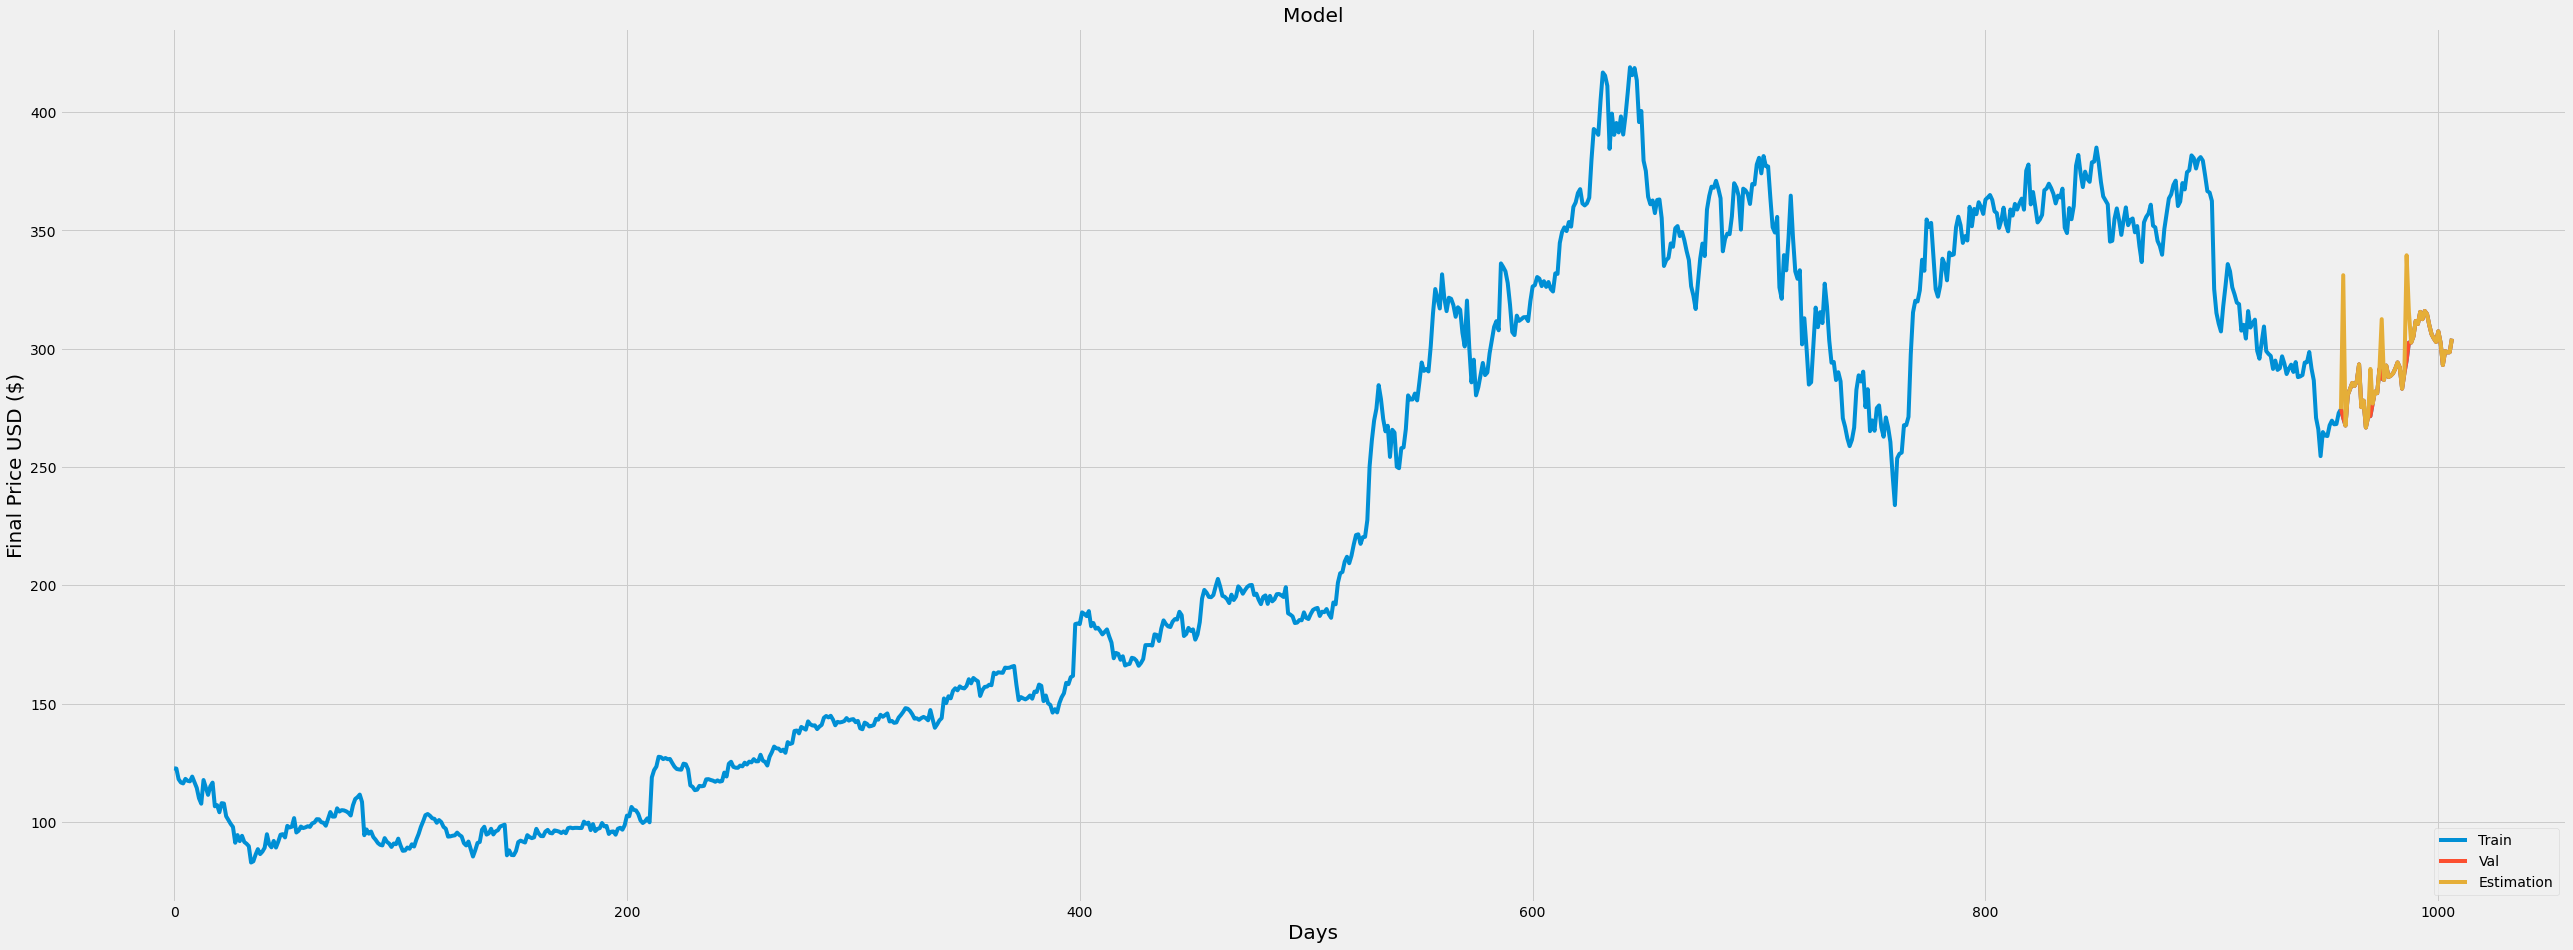

In [85]:
#Visualize the data
estimations = tree_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Estimations'] = estimations #Create a new column called 'Estimations' that will hold the predicted prices
plt.figure(figsize=(40,15))
plt.title('Model')
plt.xlabel('Days',fontsize=20)
plt.ylabel('Final Price USD ($)',fontsize=20)
plt.plot(df['Close'])
plt.plot(valid[['Close','Estimations']])
plt.legend(['Train', 'Val', 'Estimation' ], loc='lower right')
plt.show()

##Linear regression prediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


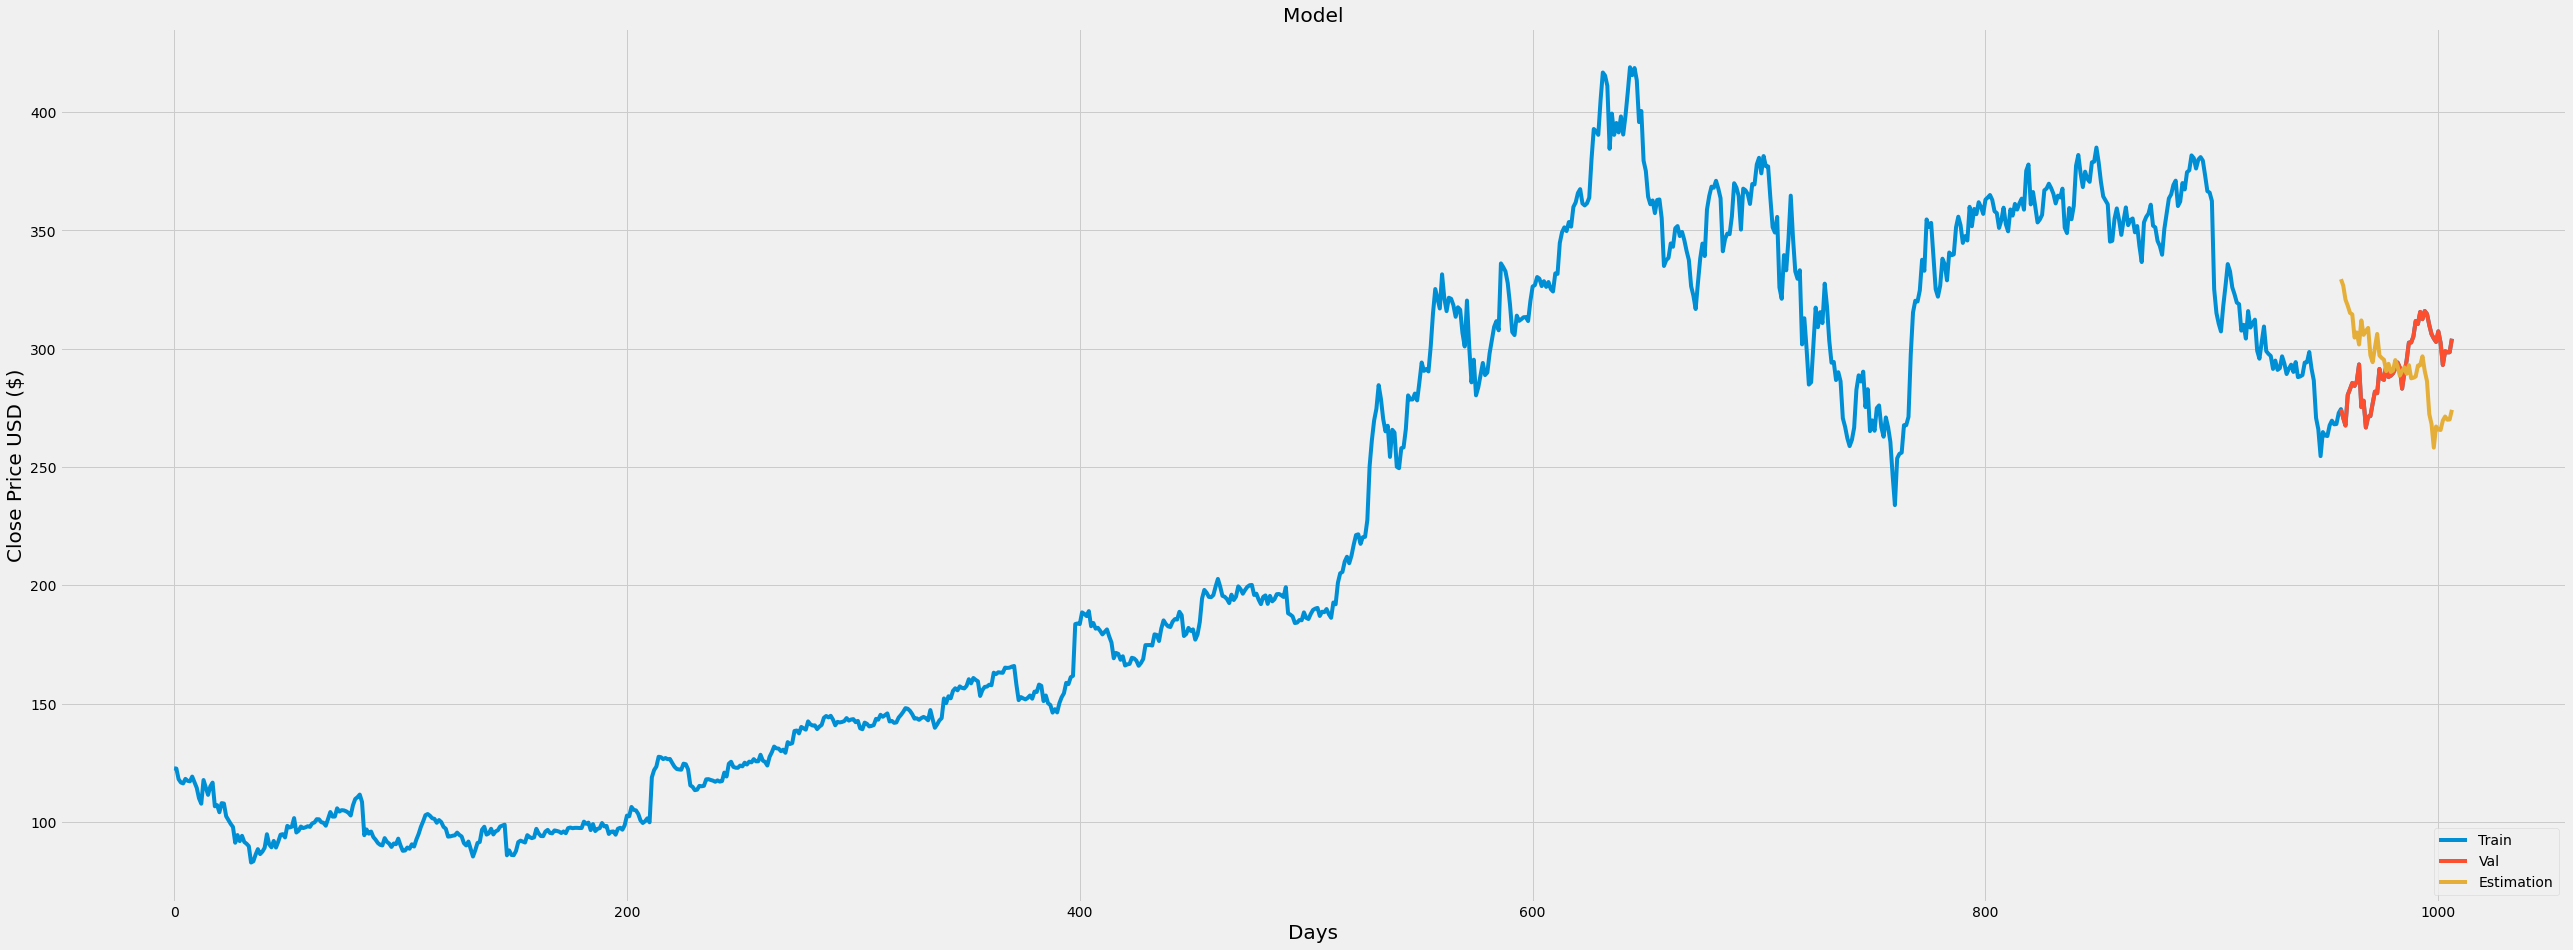

In [86]:
#Visualize the data
estimations = lr_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Estimations'] = estimations #Create a new column called 'Estimations' that will hold the predicted prices
plt.figure(figsize=(40,15))
plt.title('Model')
plt.xlabel('Days',fontsize=20)
plt.ylabel('Close Price USD ($)',fontsize=20)
plt.plot(df['Close'])
plt.plot(valid[['Close','Estimations']])
plt.legend(['Train', 'Val', 'Estimation' ], loc='lower right')
plt.show()

##Conclusion: Tree Prediction model is much better than linear regression prediction